# Singular Value Decomposition

En este notebook se busca implementar la metodología SVD con el fin de reducir la dimensión en nuestros
datos utilizando la aproximación (ver presentación)

$$
\mathbf{A_k} = \mathbf{U}_{k} \mathbf{\Sigma}_{k}  \mathbf{V}_{k}^{T} \approx \mathbf{A}
$$

Aquí, la matriz $\mathbf{A}$ representará una imagen (en escala de grises).

Su programa deberá ir obteniendo el valor de $k$ correspondiente a los umbrales

```python
umbrales = np.arange(0.1, 0.99, 0.05)
```
y debe de ir graficando cada aproximación.

**Sugerencias**

```python
help(np.diagflat)
help(np.svd)
help(np.cumsum)
help(np.where)
```

In [1]:
from scipy import misc
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Imagen prueba en escala de grises
img_A = misc.face(gray = True)

'''
#Para leer una imagen local
#se puede utilizar la función open del módulo
#Image de la librería PIL
img_A = Image.open('homero.jpg')
plt.imshow(img_A)
plt.show()

#Convertimos a blanco y negro
img_A = img_A.convert('L')
plt.imshow(img_A,  cmap='gray')
plt.show()

#Convertimos a numpy array
img_A = np.array(img_A)
'''

"\n#Para leer una imagen local\n#se puede utilizar la función open del módulo\n#Image de la librería PIL\nimg_A = Image.open('homero.jpg')\nplt.imshow(img_A)\nplt.show()\n\n#Convertimos a blanco y negro\nimg_A = img_A.convert('L')\nplt.imshow(img_A,  cmap='gray')\nplt.show()\n\n#Convertimos a numpy array\nimg_A = np.array(img_A)\n"

In [3]:
type(img_A)

numpy.ndarray

In [4]:
img_A.shape

(768, 1024)

In [5]:
#Descomposición SVD
svd_u, svd_sig, svd_vt = np.linalg.svd(img_A)

In [6]:
print(svd_u.shape)
print(svd_sig.shape)
print(svd_vt.shape)

(768, 768)
(768,)
(1024, 1024)


In [7]:
def determina_k(svd_sig, umbral = 0.95):
    '''
    Función para determinar la aproximación
    del rango que acumula cierta "energía"
    
    ENTRADA
    svd_sig: ndarray con los valores singulares ordenados
    de mayor a menor
    
    umbral: float en (0,1)
    
    SALIDA
    entero positivo que determina cual es el rango k
    para aproximar la matriz A
    '''
    
    #proporciones acumuladas
    prop = np.cumsum(svd_sig) / np.sum(svd_sig)
    
    #localiza el primer índice que
    #rebasa el umbral
    k = np.where(prop >= umbral)[0][0]
    
    return k

In [8]:
def aproximacion(svd_u, svd_sig, svd_vt, k):
    '''
    Función para obtener la aproximación de rango k
    de una matriz, utilizando SVD
    
    ENTRADA
    svd_u: ndarray que representa la matriz U de la SVD
    (se obtiene con numpy.linalg.svd)
    
    svd_sig: ndarray con los valores singulares
    (se obtiene con numpy.linalg.svd)
    
    svd_vt: ndarray que representa la matriz V^{T} de la SVD
    (se obtiene con numpy.linalg.svd)
    
    k: Entero positivo que representa el orden de la aproximación
    (se obtiene con la función determina_k)
    
    SALIDA
    ndarray que representa la aproximación de la matriz original
    '''
    
    #k + 1 porque queremos que sea inclusive
    return svd_u[:, 0:(k + 1)] @ np.diagflat(svd_sig[:(k + 1)]) @ svd_vt[0:(k + 1), :]
    

Para el umbral 0.1
El rango es 1
Imagen original necesita 786432 números
Aproximación necesita 1793 números



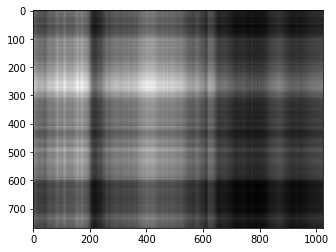

Para el umbral 0.15
El rango es 1
Imagen original necesita 786432 números
Aproximación necesita 1793 números



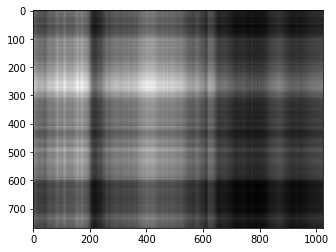

Para el umbral 0.2
El rango es 2
Imagen original necesita 786432 números
Aproximación necesita 3586 números



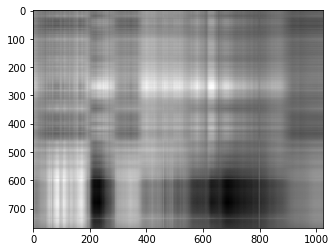

Para el umbral 0.25
El rango es 3
Imagen original necesita 786432 números
Aproximación necesita 5379 números



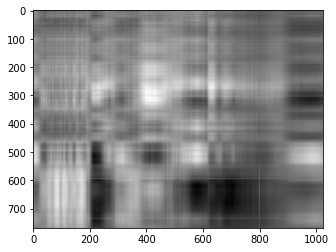

Para el umbral 0.3
El rango es 5
Imagen original necesita 786432 números
Aproximación necesita 8965 números



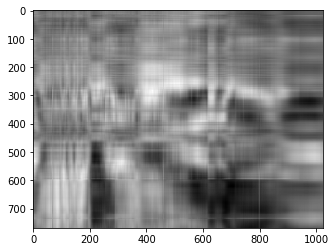

Para el umbral 0.35
El rango es 8
Imagen original necesita 786432 números
Aproximación necesita 14344 números



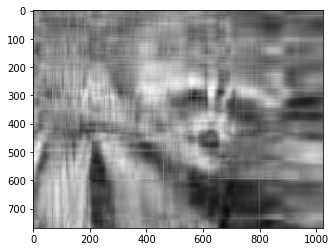

Para el umbral 0.4
El rango es 13
Imagen original necesita 786432 números
Aproximación necesita 23309 números



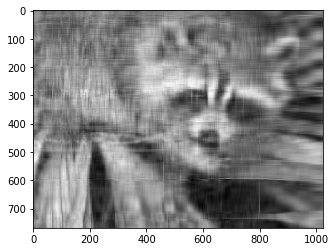

Para el umbral 0.45
El rango es 19
Imagen original necesita 786432 números
Aproximación necesita 34067 números



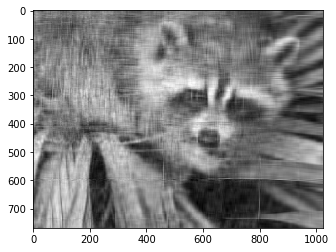

Para el umbral 0.5
El rango es 28
Imagen original necesita 786432 números
Aproximación necesita 50204 números



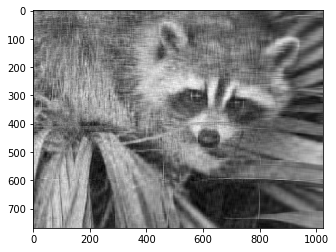

Para el umbral 0.55
El rango es 39
Imagen original necesita 786432 números
Aproximación necesita 69927 números



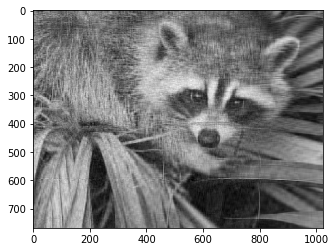

Para el umbral 0.6
El rango es 53
Imagen original necesita 786432 números
Aproximación necesita 95029 números



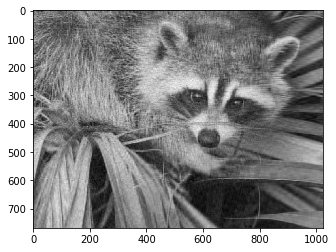

Para el umbral 0.65
El rango es 69
Imagen original necesita 786432 números
Aproximación necesita 123717 números



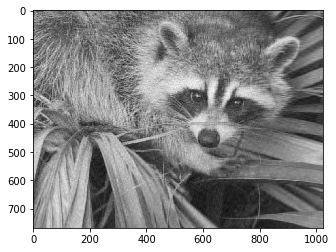

Para el umbral 0.7
El rango es 88
Imagen original necesita 786432 números
Aproximación necesita 157784 números



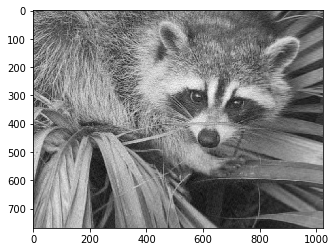

Para el umbral 0.75
El rango es 111
Imagen original necesita 786432 números
Aproximación necesita 199023 números



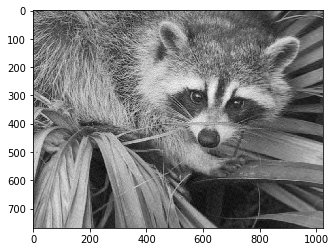

Para el umbral 0.8
El rango es 139
Imagen original necesita 786432 números
Aproximación necesita 249227 números



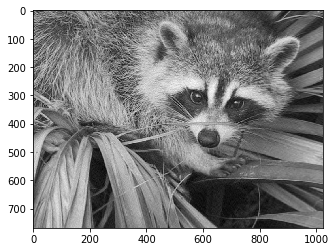

Para el umbral 0.85
El rango es 174
Imagen original necesita 786432 números
Aproximación necesita 311982 números



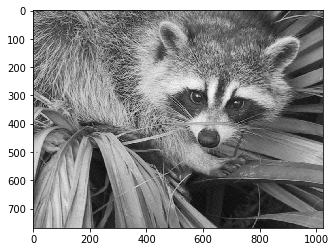

Para el umbral 0.9
El rango es 222
Imagen original necesita 786432 números
Aproximación necesita 398046 números



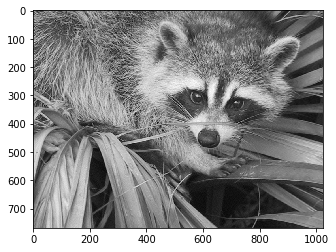

Para el umbral 0.95
El rango es 302
Imagen original necesita 786432 números
Aproximación necesita 541486 números



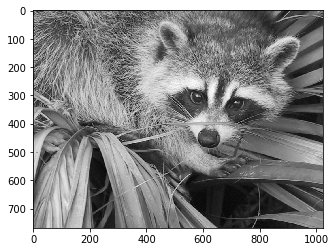

In [9]:
umbrales = np.arange(0.1, 0.99, 0.05)
m = img_A.shape[0]
n = img_A.shape[1]
num_orig = m * n
for u in umbrales:
    k = determina_k(svd_sig, umbral = u)
    print('Para el umbral', round(u, 4))
    print('El rango es', k + 1)
    print('Imagen original necesita', m * n, 'números')
    print('Aproximación necesita', (k + 1)* (m + n + 1), 'números')
    print()
    plt.imshow(aproximacion(svd_u, svd_sig, svd_vt, k),  cmap='gray')
    plt.show()